In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pca import pca

This dataset contains a distance matrix of a selection of lysozyme structures from the Protein DataBank .\
It has 172 rows and 173 columns.\
The best way to analyzing of this dataset is Multisimentional scaling or MDS because it is a technic of dimensionality reduction which is based on a Distance matrix. Sometimes a dataset is so huge that we can not analyze it with PCA because of the huge correlation matrix so we need another method like MDS to be able to use a distance matrix but in this case, because the data set is a distance matrix, not the huge primary dataset so we can also use the PCA.\
The important thing is that I expected the result of PCA and MDS would be the same because minimizing the linear distance is the same as maximizing the linear correlation.\
there is no need to be standardized because these numbers are the differences between the two points.\
So I tried to first do the PCA and then MDS .

In [2]:
df=pd.read_csv("lysozyme_rmsds.csv")
df

,Unnamed: 0,1ta0,5m1y,1flq,4ru1,1uia,3ma8,2zc6,4m53,1cwv,...,5dla,4u2a,6fe3,4ws6,225l,1l17,4zee,5hmj,4qdn,4x6p
0,1ta0,0.000000,9.944671,10.914137,5.368414,10.147917,6.330169,13.397298,4.796260,6.708178,...,10.748649,4.697932,6.442754,5.967243,6.613105,6.550033,10.885024,10.758552,10.531178,7.134530
1,5m1y,9.944671,0.000000,0.351689,8.778090,0.360542,6.532751,6.447437,11.661980,10.892651,...,0.450633,6.518186,10.142028,8.008221,5.411168,5.225135,0.423226,0.382607,4.660109,6.716681
2,1flq,10.914137,0.351689,0.000000,8.781974,0.201154,5.892352,6.476417,10.141856,8.676370,...,0.300225,6.862653,8.398187,8.305965,5.385658,5.390587,0.312325,0.241490,4.646545,6.584307
3,4ru1,5.368414,8.778090,8.781974,0.000000,8.802099,6.510888,11.596014,6.613473,6.483236,...,10.002309,9.219876,8.978669,5.131378,8.586637,9.308215,7.545538,9.995192,11.135262,10.210994
4,1uia,10.147917,0.360542,0.201154,8.802099,0.000000,8.169978,6.458828,11.358191,10.635841,...,0.296834,7.002353,11.221244,10.178038,5.404494,5.409590,0.333920,0.247616,4.522474,6.734468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,1l17,6.550033,5.225135,5.390587,9.308215,5.409590,12.250709,6.513305,9.136604,9.281223,...,5.382979,7.049519,9.732915,7.471374,0.162718,0.000000,5.373169,5.411511,5.635189,11.884937
168,4zee,10.885024,0.423226,0.312325,7.545538,0.333920,5.877982,6.964976,10.116202,8.698651,...,0.286652,6.996474,7.530556,10.148434,5.368462,5.373169,0.000000,0.273322,4.552373,6.720388
169,5hmj,10.758552,0.382607,0.241490,9.995192,0.247616,5.882972,6.930295,10.138183,8.662763,...,0.146255,6.440816,8.419391,10.177090,5.406244,5.411511,0.273322,0.000000,4.656623,6.772748
170,4qdn,10.531178,4.660109,4.646545,11.135262,4.522474,10.147237,5.835574,12.161131,9.798632,...,4.654700,6.477708,5.306617,6.123214,5.641388,5.635189,4.552373,4.656623,0.000000,5.874020


shape of data

In [3]:
df.shape

(172, 173)

check the null data

In [4]:
df.isnull().sum().sum()

0

drop the first column that is unused

In [5]:
df=df.drop("Unnamed: 0", axis=1)
df.head()

,1ta0,5m1y,1flq,4ru1,1uia,3ma8,2zc6,4m53,1cwv,6nup,...,5dla,4u2a,6fe3,4ws6,225l,1l17,4zee,5hmj,4qdn,4x6p
0,0.000000,9.944671,10.914137,5.368414,10.147917,6.330169,13.397298,4.796260,6.708178,5.249331,...,10.748649,4.697932,6.442754,5.967243,6.613105,6.550033,10.885024,10.758552,10.531178,7.134530
1,9.944671,0.000000,0.351689,8.778090,0.360542,6.532751,6.447437,11.661980,10.892651,8.494948,...,0.450633,6.518186,10.142028,8.008221,5.411168,5.225135,0.423226,0.382607,4.660109,6.716681
2,10.914137,0.351689,0.000000,8.781974,0.201154,5.892352,6.476417,10.141856,8.676370,8.771998,...,0.300225,6.862653,8.398187,8.305965,5.385658,5.390587,0.312325,0.241490,4.646545,6.584307
3,5.368414,8.778090,8.781974,0.000000,8.802099,6.510888,11.596014,6.613473,6.483236,7.988591,...,10.002309,9.219876,8.978669,5.131378,8.586637,9.308215,7.545538,9.995192,11.135262,10.210994
4,10.147917,0.360542,0.201154,8.802099,0.000000,8.169978,6.458828,11.358191,10.635841,8.761022,...,0.296834,7.002353,11.221244,10.178038,5.404494,5.409590,0.333920,0.247616,4.522474,6.734468


we can see we need 26 components to get an 85%  variance of data. starting the PCA model, I used a percentage instead of the number of components to find the number of components. we can see we need 26 components to get an 85%  variance of data. but I think the first and second one are so important as we can see in the Scree plot and with these 2 we can get more than 60% of the variance.


In [6]:
X=df.values
model=pca(n_components=0.85, normalize=False) 
model=pca(n_components=3, normalize=False) 
results = model.fit_transform(X)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [172] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


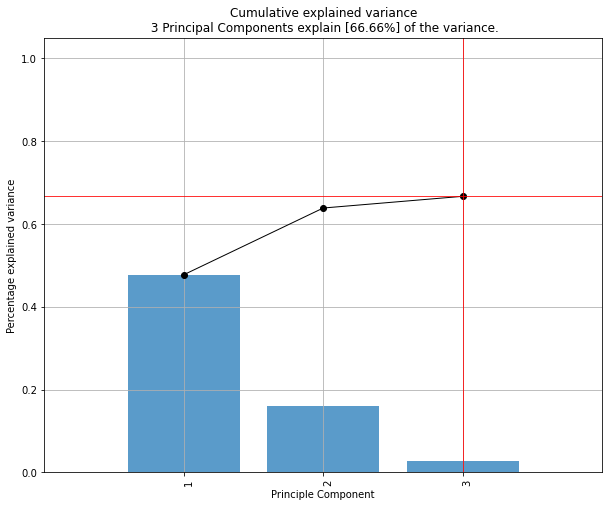

<Figure size 432x288 with 0 Axes>

In [7]:

model.plot(figsize=(10,8))
plt.show()

Here we can see the result of PCA 3 different groups are very clear.

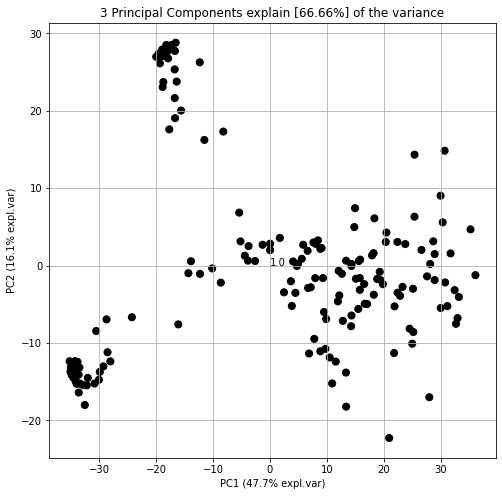

In [8]:
model.scatter( legend=False, figsize=(8,8) , label=True)
plt.show()

*MDS*

As I understand this dataset is the result of the distance matrix so there is no need to calculate the distance matrix by myself.


In [9]:
D=df.values
m = D.mean(axis=0)
A = -0.5 * (D - m[None,:] - m[:,None] + m.mean())

Based on plot first 3 point are the best.

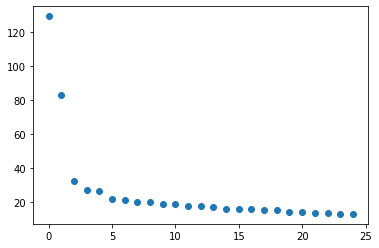

In [10]:

vals, vecs = np.linalg.eigh(A)
vals = vals[::-1]
vecs = vecs[:, ::-1]
plt.scatter(np.arange(25), vals[:25])
plt.show()

# New (principal) coordinates
md = vecs[:, :3] * vals[:3]**0.5

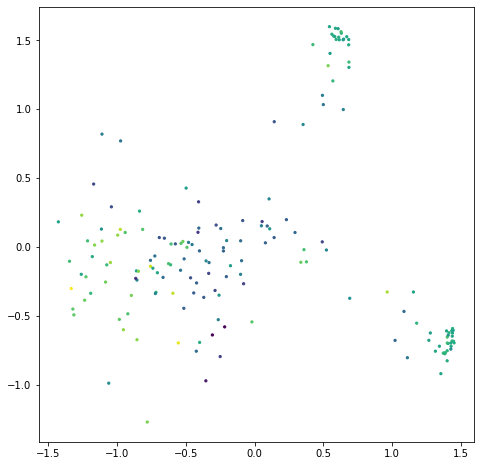

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.scatter(*md[:, [0,1]].T,s=5,c=md[:,2])
plt.show()

we can see the 3 important categories which mean those point in each category are more alike than those further apart.MDS arranges the points on the plot so that the distances among each pair of points correlate as best as possible to the dissimilarity between those two samples.\
because this distance is based on root-mean-square deviation(RMSD) so in each group, the RMSD very looks like each other\
Alse, as I predicted before the result of MDS and PCA, are the same.